In [4]:
# install packages
# pip install PyPDF
# pip install textract


In [7]:
import PyPDF2 
import textract

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [26]:
filename = './data/Tourisms.pdf'
my_file = open(filename,'rb')
pdfReader = PyPDF2.PdfFileReader(my_file)

In [27]:
num_pages = pdfReader.numPages
count = 0
text = ""

In [28]:
while count < num_pages:
    pageObj = pdfReader.getPage(count)
    count +=1
    text += pageObj.extractText()
    
if text != "":
   text = text
else:
   text = textract.process(fileurl, method='tesseract', language='eng')

In [29]:
# Add more stopwords

tokens = word_tokenize(text)
lowercase_tokens = [token.lower() for token in tokens]

In [32]:
print('loaded tokens:', len(lowercase_tokens))

loaded tokens: 19479


In [35]:
from nltk.probability import FreqDist
fdist = FreqDist(lowercase_tokens)
print(fdist)

<FreqDist with 3388 samples and 19479 outcomes>


In [38]:
print(fdist.most_common(100))

[(',', 1044), ('the', 814), ('.', 754), ('of', 664), ('and', 594), ('to', 497), ('tourism', 354), ('in', 325), (')', 284), ('(', 277), ('for', 265), ('a', 179), ('is', 162), (':', 154), ('on', 151), ('that', 142), ('are', 138), ('from', 118), ('local', 107), ('as', 98), ('at', 89), ('2018', 89), ('water', 88), ('by', 87), ('management', 86), ('with', 82), ('be', 79), ('destinations', 76), ('will', 75), ('not', 67), ('costs', 65), ('this', 62), ('waste', 61), ('destination', 61), ('can', 61), ('have', 60), ('retrieved', 57), ('such', 56), ('infrastructure', 55), ('growth', 54), ('assets', 54), ('which', 52), ('https', 52), ('manage', 51), ('world', 51), ('resources', 50), ('has', 49), ('an', 48), ('managing', 46), ('their', 46), ('risk', 45), ('%', 45), ('invisible', 44), ('or', 44), ('global', 44), ('travel', 42), ('sustainable', 42), ('more', 41), ('international', 39), ('capital', 39), ('new', 39), ('systems', 39), ('use', 38), ('tourist', 38), ('economic', 38), ('data', 37), ('natur

In [43]:
print("Total number of tokens in a corpus: " + str(fdist.N()))

Total number of tokens in a corpus: 19479


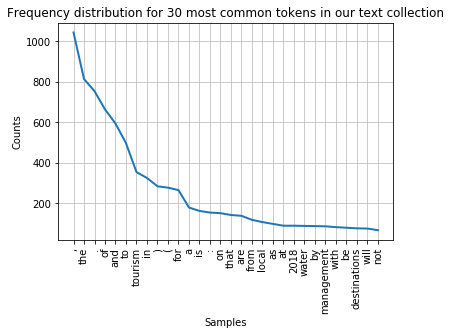

In [45]:
fdist.plot(30, title='Frequency distribution for 30 most common tokens in our text collection')

In [50]:
from nltk.corpus import stopwords
import string


[('tourism', 354), ('local', 107), ('2018', 89), ('water', 88), ('management', 86), ('destinations', 76), ('costs', 65), ('waste', 61), ('destination', 61), ('retrieved', 57), ('infrastructure', 55), ('growth', 54), ('assets', 54), ('https', 52), ('manage', 51), ('world', 51), ('resources', 50), ('managing', 46), ('risk', 45), ('invisible', 44), ('global', 44), ('travel', 42), ('sustainable', 42), ('international', 39), ('capital', 39), ('new', 39), ('systems', 39), ('use', 38), ('tourist', 38), ('economic', 38)]


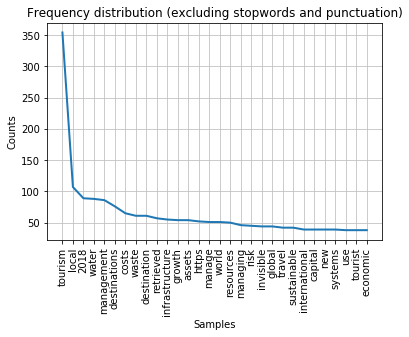

In [52]:
remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits))

filtered_text = [word 
                 for word in lowercase_tokens 
                 if not word in remove_these] 
fdist_filtered = FreqDist(filtered_text)
print(fdist_filtered.most_common(30))
fdist_filtered.plot(30,title='Frequency distribution (excluding stopwords and punctuation)')


In [54]:
from collections import Counter


simple_frequencies_dict = Counter(filtered_text)

In [55]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

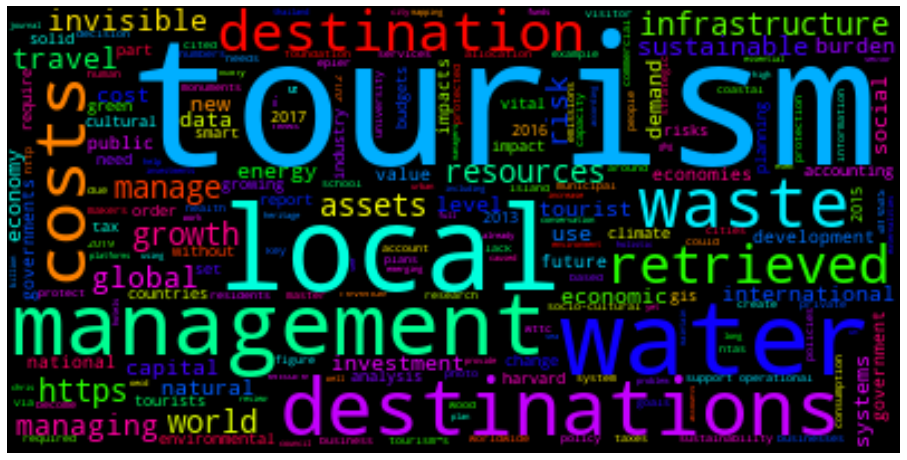

In [60]:
some_more_words_to_remove = [ 'rs', 'per', 'would', '000', 'may','two','years','also','case','general','year','cases','one','total','number','2018']
numbers_1_to_100 = [str(integer) for integer in range(101)]
extra_punctuation_to_remove = ['.', '..','...','....','.....','......', ').', '.,']
individual_letters = list(string.ascii_lowercase)

remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits) 
        + numbers_1_to_100 + extra_punctuation_to_remove + individual_letters+some_more_words_to_remove)

filtered_text = [word 
                 for word in lowercase_tokens 
                 if not word in remove_these]
simple_frequencies_dict = Counter(filtered_text)


cloud = WordCloud(max_font_size=80, colormap="hsv").generate_from_frequencies(simple_frequencies_dict)
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()